Retrieve Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
df = pd.read_csv("http://storm.cis.fordham.edu/~yli/data/tayko.csv")

#pd.set_option('precision',2)
#np.set_printoptions(precision=2)

In [ ]:
#just to delete the spending anomaly, where purchase was 0 but spending was reported as 1. Note: only one customer had spending = 1 as well.
mask = df['Spending']==1
mask.sum()
for i in df[mask].index:
  df.loc[i,'Spending'] = 0

#Study of Characteristics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   source_a              2000 non-null   int64 
 1   source_c              2000 non-null   int64 
 2   source_b              2000 non-null   int64 
 3   source_d              2000 non-null   int64 
 4   source_e              2000 non-null   int64 
 5   source_m              2000 non-null   int64 
 6   source_o              2000 non-null   int64 
 7   source_h              2000 non-null   int64 
 8   source_r              2000 non-null   int64 
 9   source_s              2000 non-null   int64 
 10  source_t              2000 non-null   int64 
 11  source_u              2000 non-null   int64 
 12  source_p              2000 non-null   int64 
 13  source_x              2000 non-null   int64 
 14  source_w              2000 non-null   int64 
 15  Freq                  2000 non-null   

In [ ]:
df.head()

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,...,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending,Partition
0,0,0,1,0,0,0,0,0,0,0,...,0,2,3662,3662,1,0,1,1,128,P2
1,0,0,0,0,1,0,0,0,0,0,...,0,0,2900,2900,1,1,0,0,0,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,2,3883,3914,0,0,0,1,127,P1
3,0,1,0,0,0,0,0,0,0,0,...,0,1,829,829,0,1,0,0,0,P2
4,0,1,0,0,0,0,0,0,0,0,...,0,1,869,869,0,0,0,0,0,P1


###Describing columns

In [ ]:
#Characteristics 1 - 23
#ways to check all columns at once:
for column in df:
  print(df[column].describe())



count    2000.000000
mean        0.126500
std         0.332495
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: source_a, dtype: float64
count    2000.000000
mean        0.056000
std         0.229979
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: source_c, dtype: float64
count    2000.000000
mean        0.060000
std         0.237546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: source_b, dtype: float64
count    2000.000000
mean        0.041500
std         0.199493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: source_d, dtype: float64
count    2000.000000
mean        0.151000
std         0.358138
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: source_e, dtype: float64
count

###Checking for if any null

In [ ]:
df.isnull().any()
#we actually don't even have to do this since df.info() tells us non-null count and they are all 2000
#none of the columns have null values

source_a                False
source_c                False
source_b                False
source_d                False
source_e                False
source_m                False
source_o                False
source_h                False
source_r                False
source_s                False
source_t                False
source_u                False
source_p                False
source_x                False
source_w                False
Freq                    False
last_update_days_ago    False
1st_update_days_ago     False
Web order               False
Gender=male             False
Address_is_res          False
Purchase                False
Spending                False
Partition               False
dtype: bool

#####Removing columns that aren't useful

In [ ]:
df = df.drop('last_update_days_ago', axis = 1)
df = df.drop('1st_update_days_ago', axis = 1)
df = df.drop('Purchase', axis = 1)
#df = df.drop('Partition', axis = 1)

In [ ]:
#turn spending into categorical data
df['Spending'] = df['Spending'].astype('object')

###Graphs

######Box Plots


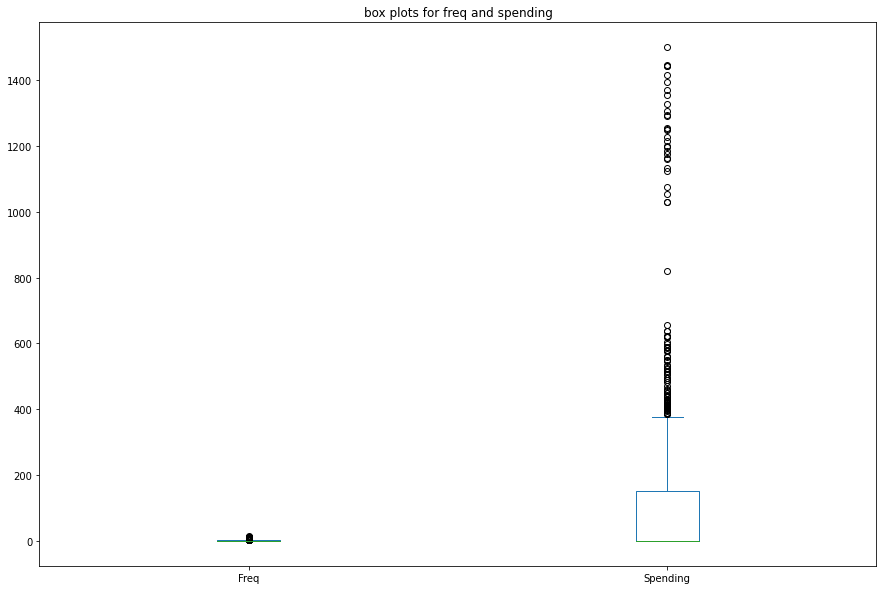

In [ ]:
#outliers in both Freq and Spending
df[['Freq','Spending']].plot.box(sharey=True, figsize=(15,10), title='box plots for freq and spending', whis = 1.5)

######Density Plots

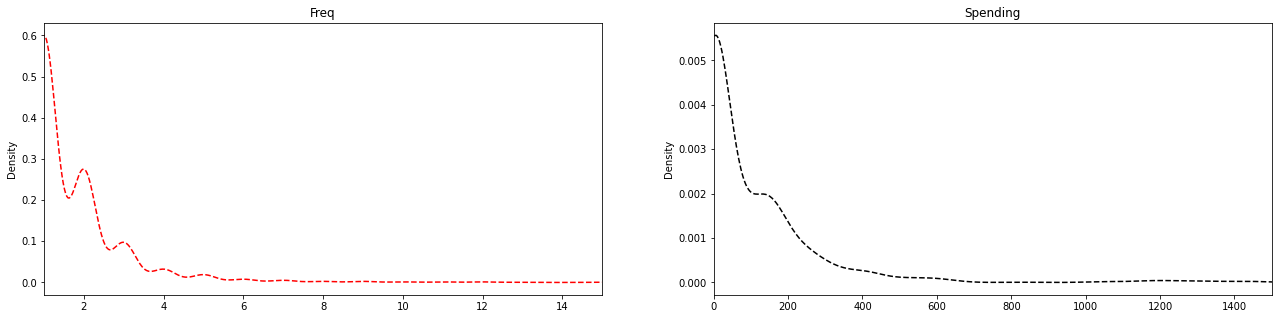

In [ ]:
fig, axs=plt.subplots(1,2,figsize=(22,5))
df['Freq'].plot.density(ax=axs[0], color='red',linestyle='--', title = 'Freq',xlim=(1,15))
df['Spending'].plot.density(ax=axs[1], color='black',linestyle='--', title = 'Spending',xlim=(0,1500))

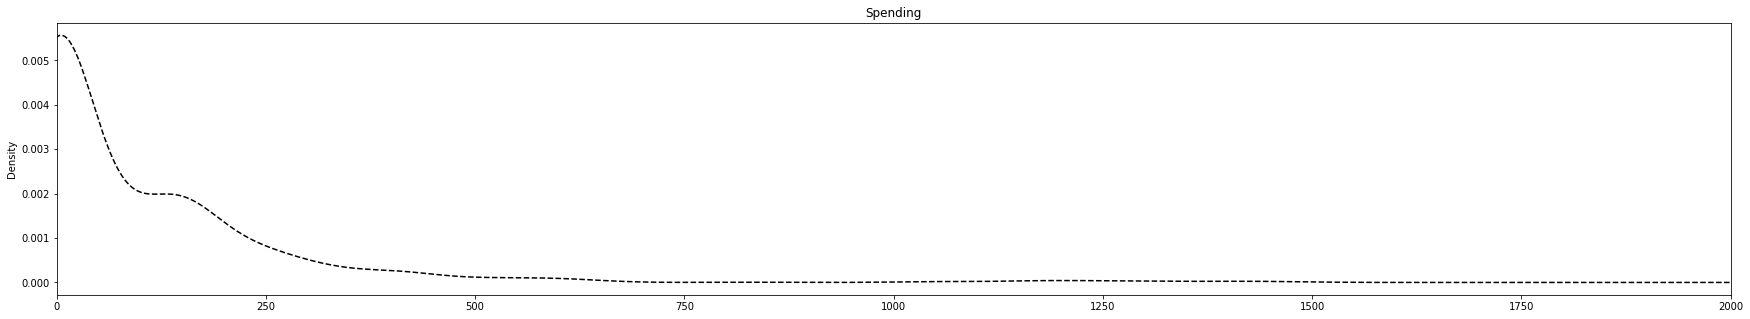

In [ ]:
fig, axs=plt.subplots(figsize=(30,5))
df['Spending'].plot.density(color='black',linestyle='--', title = 'Spending',xlim=(0,2000))

######Histogram Plots

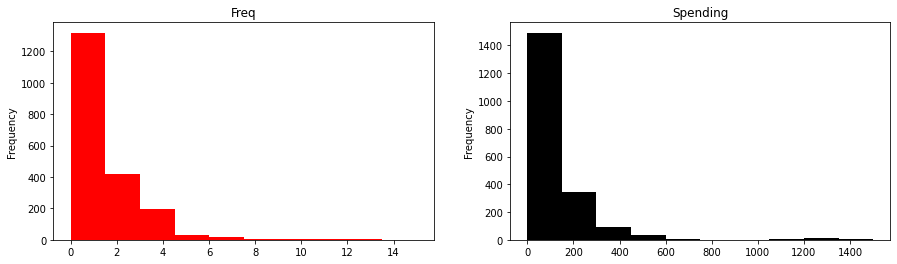

In [ ]:
fig, axs=plt.subplots(1,2,figsize=(15,4))
df['Freq'].plot.hist(ax=axs[0], color='red', title='Freq')
df['Spending'].plot.hist(ax=axs[1], color='black', title='Spending')


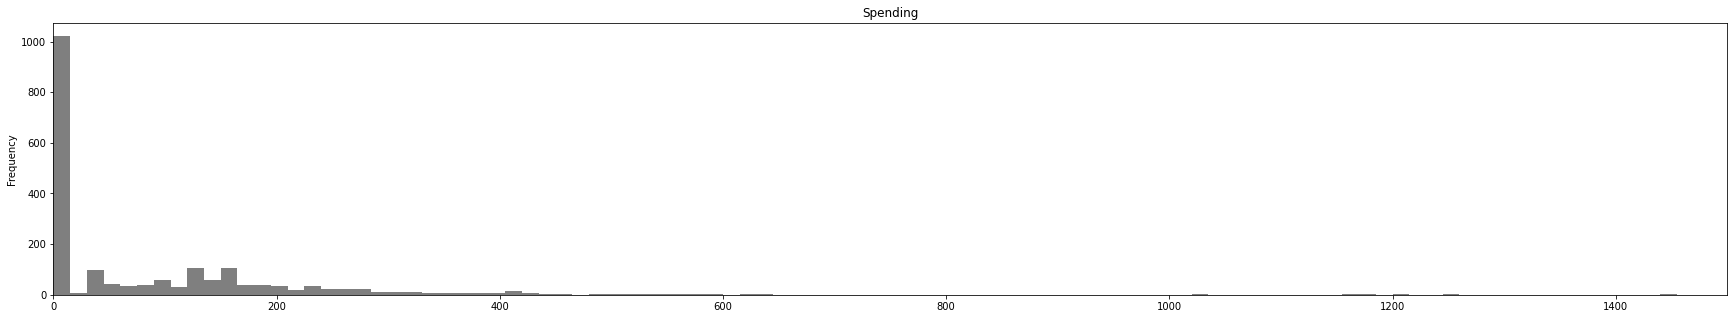

In [ ]:
fig, axs=plt.subplots(figsize=(30,5))
df['Spending'].plot.hist(bins = 100, alpha=0.5, histtype='stepfilled', color='black', title = 'Spending',xlim=(0,1500))

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
#df1 = df1[df1.Spending !=0]
df1.drop(df1.index[df1['Spending'] == 0], inplace=True)

In [ ]:
df1['Spending'].where(df1['Spending']==0).sum()

0

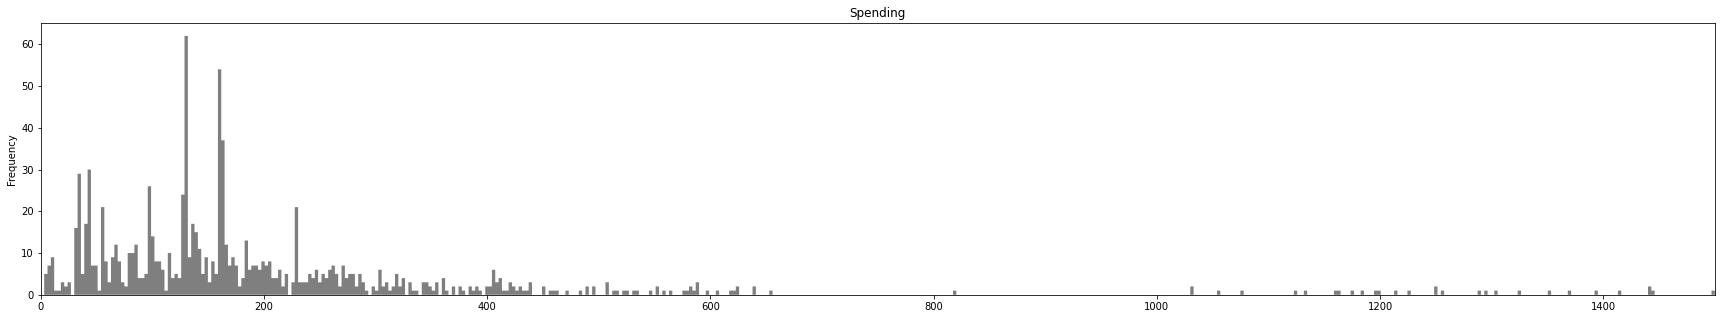

In [ ]:
fig, axs=plt.subplots(figsize=(30,5))
df1['Spending'].plot.hist(bins = 500, alpha=0.5, histtype='stepfilled', color='black', title = 'Spending',xlim=(0,1500))

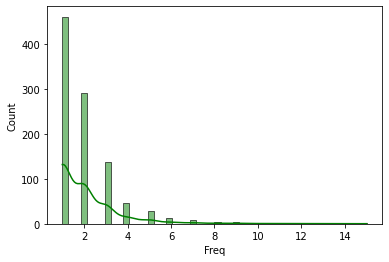

In [ ]:
sns.histplot(df1['Freq'], bins=50, color='green', kde=True)

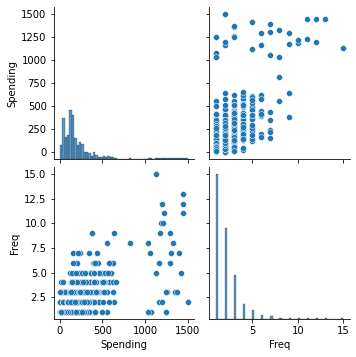

In [ ]:
sns.pairplot(df1[['Spending','Freq']])

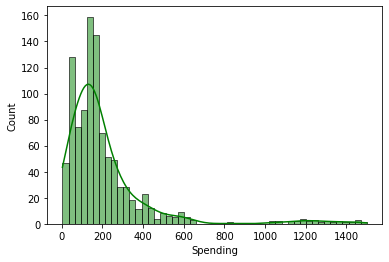

In [ ]:
sns.histplot(df1['Spending'], bins=50, color='green', kde=True)

In [ ]:
df1

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,...,source_u,source_p,source_x,source_w,Freq,Web order,Gender=male,Address_is_res,Spending,Partition
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,2,1,0,1,128,P2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,127,P1
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,4,1,1,0,489,P1
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,174,P1
13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,1,0,1416,P1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,55,P1
1992,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,2,0,1,0,133,P2
1994,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,2,0,1,0,184,P1
1995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,30,P1


# Data Cleaning


###Binning

######Spending

Looking at the plots above, we want to bin spending into 4 groups:
1. group that spends 0
2. group that spends 1-300
3. group that spends 301-1000
4. group that spends >1000

In [ ]:
df1['ew_bin'] =pd.cut(df1['Spending'],4)
df1['ew_bin'].value_counts().sort_index()

(1.503, 377.25]      889
(377.25, 751.5]       81
(751.5, 1125.75]       6
(1125.75, 1500.0]     24
Name: ew_bin, dtype: int64

In [ ]:
df1['qbinned']=pd.qcut(df1['Spending'], 5)
df1['qbinned'].value_counts().sort_index()

(2.999, 69.0]      201
(69.0, 130.0]      221
(130.0, 165.0]     182
(165.0, 266.0]     197
(266.0, 1500.0]    199
Name: qbinned, dtype: int64

In [ ]:
df1.groupby('ew_bin')['Freq'].mean()

ew_bin
(1.503, 377.25]      1.761530
(377.25, 751.5]      3.839506
(751.5, 1125.75]     5.000000
(1125.75, 1500.0]    7.083333
Name: Freq, dtype: float64

In [ ]:
df1.groupby('qbinned')['Freq'].mean()

qbinned
(2.999, 69.0]      1.407960
(69.0, 130.0]      1.556561
(130.0, 165.0]     1.703297
(165.0, 266.0]     2.081218
(266.0, 1500.0]    3.668342
Name: Freq, dtype: float64

In [ ]:
df1['binTest'] = pd.cut(x=df1['Spending'], bins=[0,100,400,1000,1600], labels=['1-100','101-400','401-1000','>1000'])

In [ ]:
df1['binTest'].value_counts().sort_index()

1-100       293
101-400     605
401-1000     73
>1000        29
Name: binTest, dtype: int64

In [ ]:
df1.groupby('binTest').Freq.describe()

,count,mean,std,min,25%,50%,75%,max
binTest,,,,,,,,
1-100,293.0,1.450512,0.673705,1.0,1.0,1.0,2.0,4.0
101-400,605.0,1.945455,1.140175,1.0,1.0,2.0,2.0,9.0
401-1000,73.0,3.876712,1.715495,1.0,3.0,4.0,5.0,9.0
>1000,29.0,6.620690,4.065656,1.0,3.0,7.0,10.0,15.0


In [ ]:
#binning
df['Spen_binned'] = pd.cut(x=df['Spending'], bins=[-1,0,300,1000,1600], labels=['0','1-300','301-1000','>1000'])

In [ ]:
df.groupby('Spen_binned').Freq.describe()

,count,mean,std,min,25%,50%,75%,max
Spen_binned,,,,,,,,
0,1000.0,0.757000,0.725588,0.0,0.0,1.0,1.0,4.0
1-300,837.0,1.710872,0.954736,1.0,1.0,1.0,2.0,7.0
301-1000,134.0,3.380597,1.711504,1.0,2.0,3.0,4.0,9.0
>1000,29.0,6.620690,4.065656,1.0,3.0,7.0,10.0,15.0


In [ ]:
df['Spen_binned'].describe()

count     2000
unique       4
top          0
freq      1000
Name: Spen_binned, dtype: object

######Freq

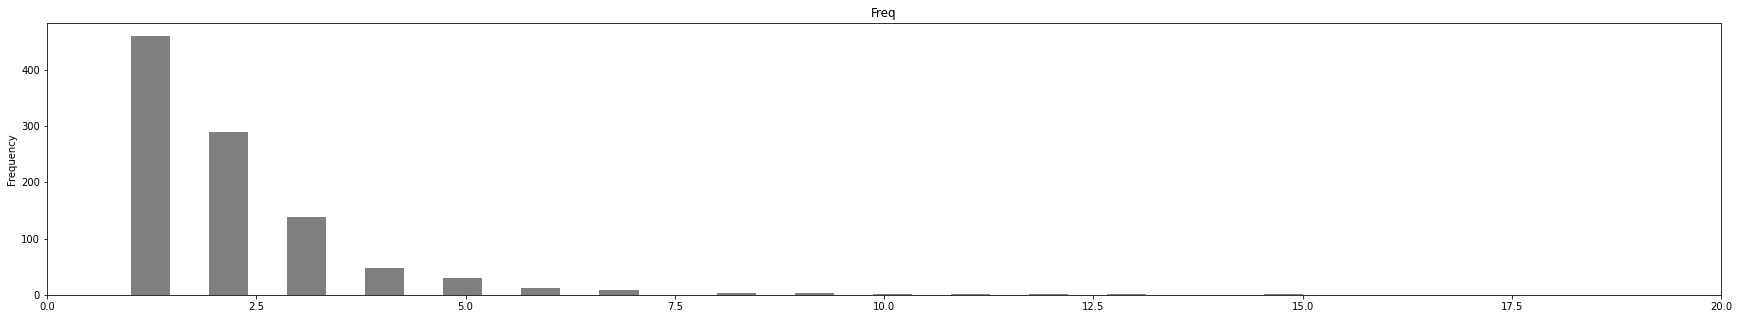

In [ ]:
fig, axs=plt.subplots(figsize=(30,5))
df1['Freq'].plot.hist(bins = 30, alpha=0.5, histtype='stepfilled', color='black', title = 'Freq',xlim=(0,20))

In [ ]:
df1['F_ew_bin'] =pd.cut(df1['Freq'],4)
df1['F_ew_bin'].value_counts().sort_index()

(0.986, 4.5]    935
(4.5, 8.0]       53
(8.0, 11.5]       8
(11.5, 15.0]      4
Name: F_ew_bin, dtype: int64

In [ ]:
df1['F_ef_bin']=pd.qcut(df1['Freq'], 2)
df1['F_ef_bin'].value_counts().sort_index()

(0.999, 2.0]    750
(2.0, 15.0]     250
Name: F_ef_bin, dtype: int64

In [ ]:
df1['F_binTest'] = pd.cut(x=df1['Freq'], bins=[0,2,7,16], labels=['1-2','3-7','>7'])

In [ ]:
df1['F_binTest'].value_counts().sort_index()

1-2    750
3-7    234
>7      16
Name: F_binTest, dtype: int64

In [ ]:
df1

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,...,Gender=male,Address_is_res,Spending,Partition,ew_bin,qbinned,binTest,F_ew_bin,F_ef_bin,F_binTest
0,0,0,1,0,0,0,0,0,0,0,...,0,1,128,P2,"(1.503, 377.25]","(69.0, 130.0]",101-400,"(0.986, 4.5]","(0.999, 2.0]",1-2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,127,P1,"(1.503, 377.25]","(69.0, 130.0]",101-400,"(0.986, 4.5]","(0.999, 2.0]",1-2
8,1,0,0,0,0,0,0,0,0,0,...,1,0,489,P1,"(377.25, 751.5]","(266.0, 1500.0]",401-1000,"(0.986, 4.5]","(2.0, 15.0]",3-7
9,1,0,0,0,0,0,0,0,0,0,...,0,0,174,P1,"(1.503, 377.25]","(165.0, 266.0]",101-400,"(0.986, 4.5]","(0.999, 2.0]",1-2
13,1,0,0,0,0,0,0,0,0,0,...,1,0,1416,P1,"(1125.75, 1500.0]","(266.0, 1500.0]",>1000,"(4.5, 8.0]","(2.0, 15.0]",3-7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991,0,0,0,0,0,0,0,0,0,0,...,1,0,55,P1,"(1.503, 377.25]","(2.999, 69.0]",1-100,"(0.986, 4.5]","(0.999, 2.0]",1-2
1992,0,0,0,0,0,0,1,0,0,0,...,1,0,133,P2,"(1.503, 377.25]","(130.0, 165.0]",101-400,"(0.986, 4.5]","(0.999, 2.0]",1-2
1994,0,0,0,0,1,0,0,0,0,0,...,1,0,184,P1,"(1.503, 377.25]","(165.0, 266.0]",101-400,"(0.986, 4.5]","(0.999, 2.0]",1-2
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,30,P1,"(1.503, 377.25]","(2.999, 69.0]",1-100,"(0.986, 4.5]","(0.999, 2.0]",1-2


In [ ]:
df['Freq_bin'] = pd.cut(x=df['Freq'], bins=[-1,0,2,7,16], labels=['0','1-2','3-7','>7'])

In [ ]:
df

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,...,source_x,source_w,Freq,Web order,Gender=male,Address_is_res,Spending,Partition,Spen_binned,Freq_bin
0,0,0,1,0,0,0,0,0,0,0,...,0,0,2,1,0,1,128,P2,1-300,1-2
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,0,P2,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,127,P1,1-300,1-2
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,P2,0,1-2
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,P1,0,1-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,30,P1,1-300,1-2
1996,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,1,0,10,P1,1-300,1-2
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,P1,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,1,1,0,P1,0,1-2


### Aggregate Columns

Combine source_ columns into one

In [ ]:
data = df.copy(deep = True)

conditions = [
              (data['source_a'] == 1),
              (data['source_c'] == 1),
              (data['source_b'] == 1),
              (data['source_d'] == 1),
              (data['source_e'] == 1),
              (data['source_m'] == 1),
              (data['source_o'] == 1),
              (data['source_h'] == 1),
              (data['source_r'] == 1),
              (data['source_s'] == 1),
              (data['source_t'] == 1),
              (data['source_u'] == 1),
              (data['source_p'] == 1),
              (data['source_x'] == 1),
              (data['source_w'] == 1)
]

values = ['A','C','B','D','E','M','O','H','R','S','T','U','P','X','W']
#values = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

data['sourceALL'] = np.select(conditions, values)

In [ ]:
data1 = data[['sourceALL','Freq','Web order','Gender=male','Address_is_res','Spending','Freq_bin','Spen_binned']]
data1

,sourceALL,Freq,Web order,Gender=male,Address_is_res,Spending,Freq_bin,Spen_binned
0,B,2,1,0,1,128,1-2,1-300
1,E,0,1,1,0,0,0,0
2,T,2,0,0,0,127,1-2,1-300
3,C,1,0,1,0,0,1-2,0
4,C,1,0,0,0,0,1-2,0
...,...,...,...,...,...,...,...,...
1995,U,1,1,0,0,30,1-2,1-300
1996,S,1,1,1,0,10,1-2,1-300
1997,0,0,0,0,0,0,0,0
1998,W,1,0,1,1,0,1-2,0


In [ ]:
data1.loc[data1.sourceALL == '0', 'sourceALL'] = 'default'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
data1['sourceALL'].describe()

count     2000
unique      16
top          E
freq       302
Name: sourceALL, dtype: object

In [ ]:
data1.groupby('sourceALL').Freq.describe()
#some of the data doesnt belong to any source --> default source...
#H - highest Freq
#O - lowest Freq

,count,mean,std,min,25%,50%,75%,max
sourceALL,,,,,,,,
A,253.0,2.071146,1.898955,0.0,1.0,1.0,3.0,13.0
B,120.0,1.050000,1.314751,0.0,0.0,1.0,2.0,7.0
C,112.0,1.491071,1.308293,0.0,1.0,1.0,2.0,9.0
D,83.0,1.734940,1.371169,0.0,1.0,1.0,2.0,8.0
E,302.0,1.258278,1.270486,0.0,1.0,1.0,2.0,10.0
H,105.0,2.085714,0.520988,1.0,2.0,2.0,2.0,4.0
M,33.0,1.424242,1.392621,0.0,1.0,1.0,2.0,6.0
O,67.0,0.492537,0.990456,0.0,0.0,0.0,1.0,5.0
P,12.0,2.000000,1.044466,1.0,1.0,2.0,3.0,4.0


In [ ]:
#source H has the highest Freq but when we look at spending it's the lowest
#when Freq > 0 but spending == 0, means they bought stuff in the past

#A - highest average spending
#P - second highest avg spending
#H - lowest average spending
data1.groupby('sourceALL').Spending.describe()

,count,unique,top,freq
sourceALL,,,,
A,253,122,0,56
B,120,26,0,84
C,112,34,0,68
D,83,30,0,36
E,302,95,0,168
H,105,12,0,93
M,33,14,0,14
O,67,13,0,54
P,12,11,43,2


In [ ]:
data1.corr()

,Freq,Web order,Gender=male,Address_is_res
Freq,1.000000,0.103400,-0.038066,0.215808
Web order,0.103400,1.000000,-0.005819,-0.039703
Gender=male,-0.038066,-0.005819,1.000000,-0.047847
Address_is_res,0.215808,-0.039703,-0.047847,1.000000


In [ ]:
#sizeable correlation between Freq and Spending
data1.groupby('Freq').Spending.describe()

,count,unique,top,freq
Freq,,,,
0,398,1,0,398
1,921,165,0,461
2,419,169,0,129
3,148,115,0,10
4,49,47,0,2
5,29,28,588,2
6,12,12,389,1
7,8,8,150,1
8,4,4,1030,1


# Scaling Features

we are not going to normalize features since spending is categorical anyways

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import cross_val_score #cross validation
from sklearn.model_selection import train_test_split #split the available dataset for training and testing

y_df = pd.DataFrame(['Freq', 'Web_'], columns=['class'])

#Feature Selection

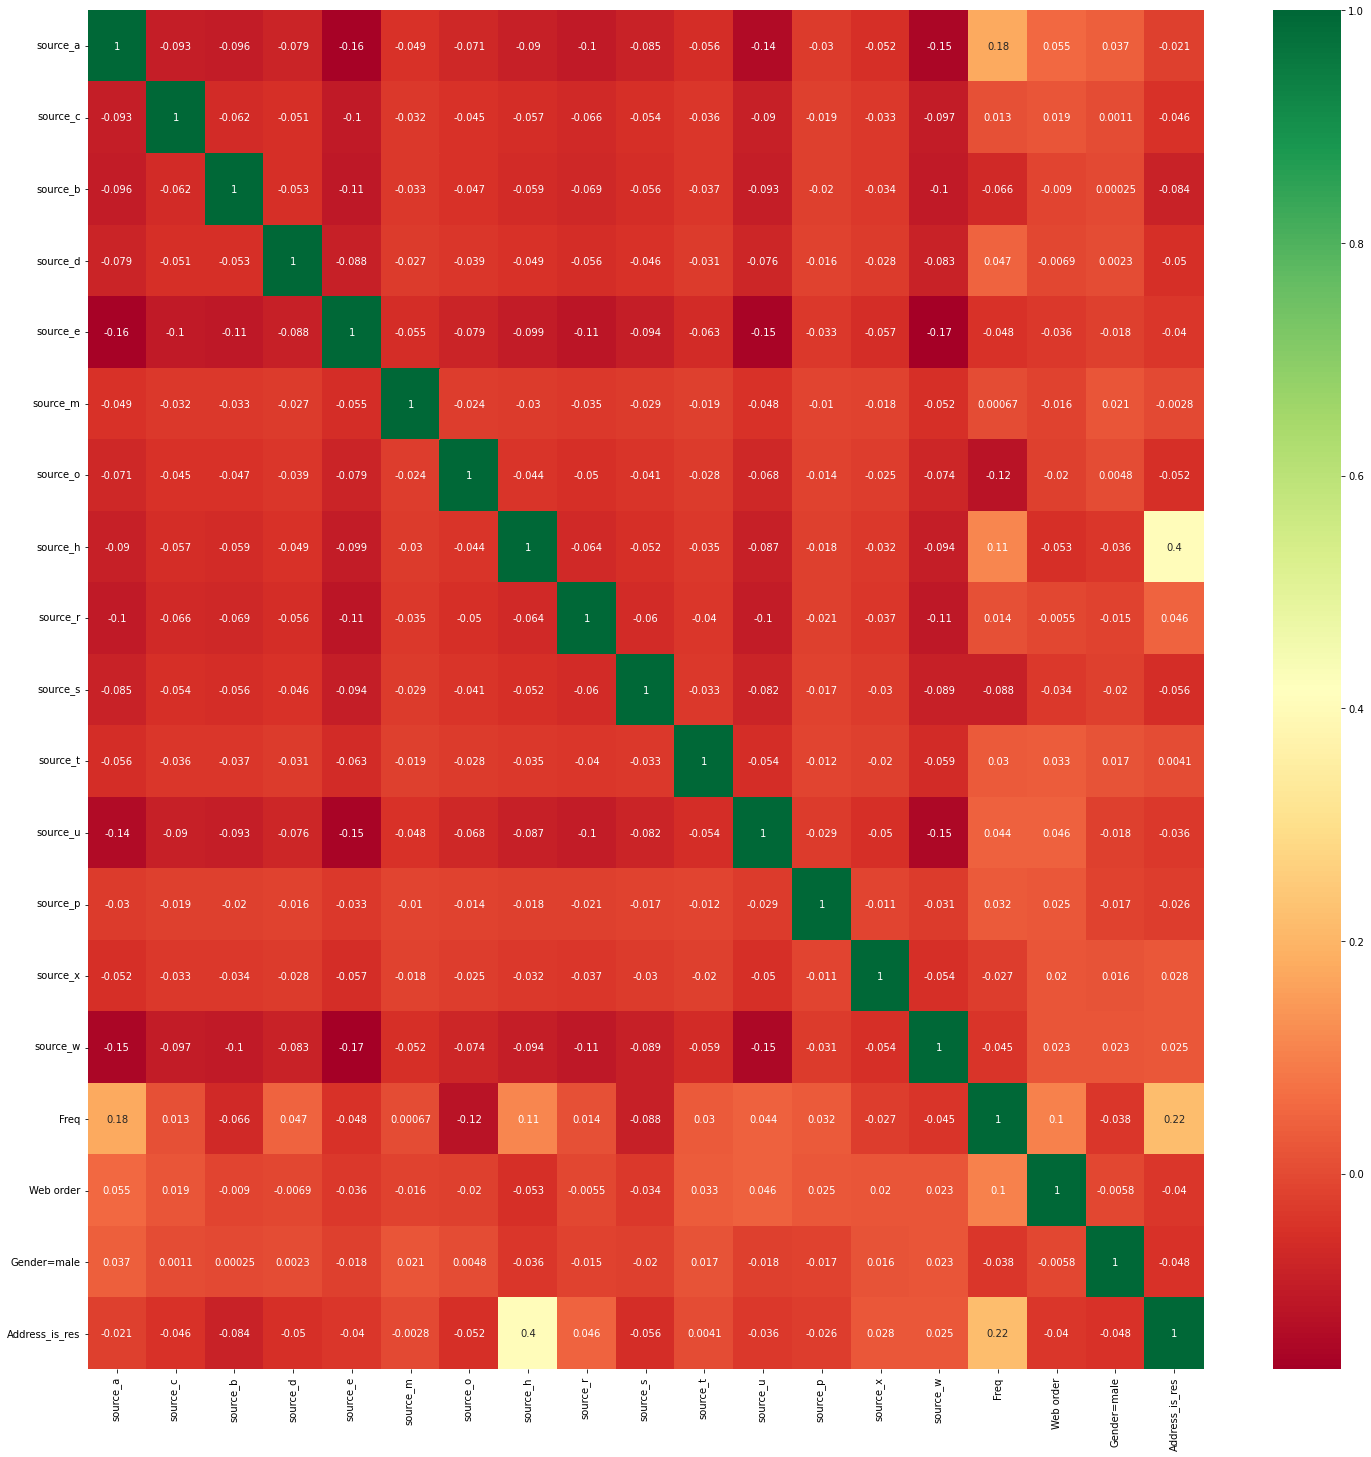

In [ ]:
#Correlation Matrix
X = df.iloc[:,0:20]  #independent columns
y = df.iloc[:,-1]    #target column i.e price range
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Information Gain


In [ ]:
print('Data:', df.columns)

#for each unique item we will run through the list to get a count
def getProbs(feat):
  allProbs = []
  tol = len(df[feat])
  uniqueItems = df[feat].unique()

  for i in uniqueItems:
    count = 0
    for j in df[feat]:
      if j == i:
        count += 1
    #print(f'P({feat}={i})', ' = ', (count/tol))
    allProbs.append([i, (count/tol)])

  return(allProbs)

getProbs('Web order')
#getProbs('Purchase')
#getProbs('Spending')
test = getProbs('Freq')
print(test)

Data: Index(['source_a', 'source_c', 'source_b', 'source_d', 'source_e', 'source_m',
       'source_o', 'source_h', 'source_r', 'source_s', 'source_t', 'source_u',
       'source_p', 'source_x', 'source_w', 'Freq', 'Web order', 'Gender=male',
       'Address_is_res', 'Spending', 'Partition', 'Spen_binned', 'Freq_bin'],
      dtype='object')
[[2, 0.2095], [0, 0.199], [1, 0.4605], [4, 0.0245], [5, 0.0145], [3, 0.074], [9, 0.002], [8, 0.002], [6, 0.006], [10, 0.001], [7, 0.004], [12, 0.001], [11, 0.001], [13, 0.0005], [15, 0.0005]]


In [ ]:
from pandas.core.arrays.numeric import T
import math
def infoD(feat):
  all = getProbs(feat)
  tol = 0
  for i in all:
    t = i[1]*(math.log2(i[1]))
    tol -= t
  return tol

print('Info(D) = ',infoD('Freq'))
print('Info(D) = ',infoD('Web order'))
print('Info(D) = ',infoD('Spending'))
print('Info(D) = ',infoD('Address_is_res'))



Info(D) =  2.1016016897677843
Info(D) =  0.9841414105340351
Info(D) =  4.875875141794201
Info(D) =  0.7619892744665404


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_iris

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#df = pd.read_csv("http://storm.cis.fordham.edu/~yli/data/tayko.csv", index_col = 0)

pd.set_option('precision',2)
np.set_printoptions(precision=2)
#df = df.drop(['last_update_days_ago', '1st_update_days_ago'], axis = 1)


###Benchmark Model and Chi-Square and Mutual_Inforamtion Feature Selection Methods
Perform Gaussian Naive Bayes classification on original dataset.

In [ ]:
df_clean = df.drop(['Partition', 'Spen_binned', 'Freq_bin'], axis=1)
Telco_C={}
Telco_C['feature_names']= df_clean.columns.values
Telco_C['data']=df_clean.values
df_clean.head()

,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,Web order,Gender=male,Address_is_res,Spending
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,1,128
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,127
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#spending binned
X = df.iloc[:,21:22]
Telco_C['target_names']=X['Spen_binned'].unique()
Telco_C['target']=X['Spen_binned'].values
Telco_C['target']
X.head()

,Spen_binned
0,1-300
1,0
2,1-300
3,0
4,0


In [ ]:
#regular spending

#Y = df.iloc[:,22:23]
#Telco_C['target_names']=Y['Freq_bin'].unique()
#Telco_C['target']=Y['Freq_bin'].values
#Telco_C['target']

In [ ]:
NB_G = GaussianNB()
NB_G_scores_old = cross_val_score(NB_G, Telco_C['data'], Telco_C['target'], cv=10,scoring='accuracy', error_score='raise')# default 5-fold

print(NB_G_scores_old)
print("Accuracy: %0.2f (+/- %0.2f)" % (NB_G_scores_old.mean(), NB_G_scores_old.std() * 2))

[0.88 0.91 0.89 0.88 0.91 0.87 0.91 0.85 0.88 0.92]
Accuracy: 0.89 (+/- 0.04)


In [ ]:
chi_selector = SelectKBest(chi2,k=5)
Telco_C['new_data_chi'] = chi_selector.fit_transform(Telco_C['data'], Telco_C['target'])
mask = chi_selector.get_support()
Telco_C['new_feature_names_chi']=Telco_C['feature_names'][mask]
Telco_C['new_data_chi'].shape

(2000, 5)

In [ ]:
Telco_C['new_feature_names_chi'] #selected top 5 by performing chi2

array(['source_a', 'source_h', 'Freq', 'Web order', 'Spending'],
      dtype=object)

In [ ]:
mi_selector = SelectKBest(mutual_info_classif,k=5)
Telco_C['new_data_mi'] = chi_selector.fit_transform(Telco_C['data'], Telco_C['target'])
mask = chi_selector.get_support()
Telco_C['new_feature_names_mi']=Telco_C['feature_names'][mask]
Telco_C['new_data_mi'].shape

(2000, 5)

In [ ]:
Telco_C['new_feature_names_mi']

array(['source_a', 'source_h', 'Freq', 'Web order', 'Spending'],
      dtype=object)

In [ ]:
set(Telco_C['new_feature_names_chi'])& set(Telco_C['new_feature_names_mi'])

{'Freq', 'Spending', 'Web order', 'source_a', 'source_h'}

In [ ]:
scores_new_chi = cross_val_score(NB_G, Telco_C['new_data_chi'], Telco_C['target'],cv=10, scoring='accuracy')
print(scores_new_chi)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores_new_chi.mean(),scores_new_chi.std()*2))

[0.97 0.97 0.96 0.95 0.96 0.94 0.94 0.96 0.96 0.98]
Accuracy: 0.96 (+/- 0.02)


#Perform Naive Bayes classification on dataset with only selected 5 features.

#Naive Bayes

###Categorical Neive Bayes
###To-do bin Freq -- did it above in binning section

In [ ]:
from sklearn.datasets import load_iris

from sklearn.naive_bayes import GaussianNB
#from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OrdinalEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
model = GaussianNB()

In [ ]:
#bin Freq to use categorical nb
X = data1.iloc[:,1:8].drop(['Freq', 'Spending', 'Spen_binned'], axis = 1)
X.head()

,Web order,Gender=male,Address_is_res,Freq_bin
0,1,0,1,1-2
1,1,1,0,0
2,0,0,0,1-2
3,0,1,0,1-2
4,0,0,0,1-2


In [ ]:
Spending_Category = {}
Spending_Category['feature_names'] = X.columns.values

In [ ]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X

array([[1., 0., 1., 1.],
       [1., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [0., 0., 0., 0.],
       [0., 1., 1., 1.],
       [0., 0., 0., 1.]])

In [ ]:
Spending_Category['data'] = X


In [ ]:
Y = data1.iloc[:,7:8]
Y.head()
Spending_Category['target_names']=Y['Spen_binned'].unique()
Spending_Category['target']=Y['Spen_binned'].values

In [ ]:
Spending_Category['target_names']

['1-300', '0', '301-1000', '>1000']
Categories (4, object): ['0' < '1-300' < '301-1000' < '>1000']

In [ ]:
Spending_Category['target']

['1-300', '0', '1-300', '0', '0', ..., '1-300', '1-300', '0', '0', '0']
Length: 2000
Categories (4, object): ['0' < '1-300' < '301-1000' < '>1000']

In [ ]:
NB_C = CategoricalNB()

In [ ]:
scores_NBC = cross_val_score(NB_C, Spending_Category['data'], Spending_Category['target'], cv=5, scoring='accuracy')
scores_NBC

array([0.66, 0.69, 0.66, 0.7 , 0.63])

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_NBC.mean(), scores_NBC.std() * 2))

Accuracy: 0.67 (+/- 0.05)


###Bernoulli Naive Bayes

BernoulliNB works on categorical values in binary format.


In [ ]:
X = df.iloc[:,15:22].drop(['Freq', 'Spending', 'Spen_binned', 'Partition'], axis = 1)
X = pd.get_dummies(X)
X.head()

,Web order,Gender=male,Address_is_res
0,1,0,1
1,1,1,0
2,0,0,0
3,0,1,0
4,0,0,0


BernoulliNB

In [ ]:
Computer = {} # a dictionary with key-value pairs
Computer['feature_names'] = X.columns.values
Computer['data']=X.values
Computer['target_names']=Y['Spen_binned'].unique()
Computer['target']=Y['Spen_binned'].values


#Computer['target_names']=Y['Spen_binned'].unique()
#Computer['target']=Y['Spen_binned'].values

In [ ]:
NB_B = BernoulliNB()#categorical binary format

In [ ]:
scores_NBB = cross_val_score(NB_B, Computer['data'], Computer['target'], cv=5, scoring='accuracy')
scores_NBB

array([0.58, 0.59, 0.55, 0.6 , 0.55])

In [ ]:
#mean and 95% confidence level
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_NBB.mean(), scores_NBB.std() * 2))

Accuracy: 0.57 (+/- 0.05)


In [ ]:
y_predict= NB_B.fit(Computer['data'],Computer['target']).predict(Computer['data'])

In [ ]:
df['predict']= y_predict
#df = df.drop('Partition', axis = 1)
#df = df.drop('Spending', axis = 1)
#df = df.drop('Freq', axis = 1)

In [ ]:
y_predict= NB_C.fit(Spending_Category['data'],Spending_Category['target']).predict(Spending_Category['data'])
data1['predict']= y_predict

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1

,sourceALL,Freq,Web order,Gender=male,Address_is_res,Spending,Freq_bin,Spen_binned,predict
0,B,2,1,0,1,128,1-2,1-300,1-300
1,E,0,1,1,0,0,0,0,0
2,T,2,0,0,0,127,1-2,1-300,0
3,C,1,0,1,0,0,1-2,0,0
4,C,1,0,0,0,0,1-2,0,0
...,...,...,...,...,...,...,...,...,...
1995,U,1,1,0,0,30,1-2,1-300,1-300
1996,S,1,1,1,0,10,1-2,1-300,1-300
1997,default,0,0,0,0,0,0,0,0
1998,W,1,0,1,1,0,1-2,0,0


Categorical Works better

#predicton tables

In [ ]:
data1.groupby('sourceALL')['predict'].describe()

,count,unique,top,freq
sourceALL,,,,
A,253,3,1-300,148
B,120,2,0,80
C,112,4,0,56
D,83,4,0,42
E,302,3,0,187
H,105,2,0,65
M,33,2,0,21
O,67,2,0,55
P,12,2,1-300,10


In [ ]:
data1.groupby('predict')['sourceALL'].describe()

,count,unique,top,freq
predict,,,,
0,1123,16,E,187
1-300,861,16,A,148
301-1000,3,3,R,1
>1000,13,6,A,7


In [ ]:
data1.groupby('predict')['Freq'].describe()

,count,mean,std,min,25%,50%,75%,max
predict,,,,,,,,
0,1123.0,0.85,0.73,0.0,0.0,1.0,1.0,2.0
1-300,861.0,2.00,1.29,1.0,1.0,2.0,3.0,7.0
301-1000,3.0,8.67,0.58,8.0,8.5,9.0,9.0,9.0
>1000,13.0,10.46,2.15,8.0,9.0,10.0,12.0,15.0


In [ ]:
data1.groupby('Freq')['predict'].describe()

,count,unique,top,freq
Freq,,,,
0,398,1,0,398
1,921,2,0,496
2,419,2,0,229
3,148,1,1-300,148
4,49,1,1-300,49
5,29,1,1-300,29
6,12,1,1-300,12
7,8,1,1-300,8
8,4,2,>1000,3


In [ ]:
data1.groupby('predict')['Freq_bin'].describe()

,count,unique,top,freq
predict,,,,
0,1123,2,1-2,725
1-300,861,2,1-2,615
301-1000,3,1,>7,3
>1000,13,1,>7,13


In [ ]:
data1.groupby('Freq_bin')['predict'].describe()

,count,unique,top,freq
Freq_bin,,,,
0,398,1,0,398
1-2,1340,2,0,725
3-7,246,1,1-300,246
>7,16,2,>1000,13


In [ ]:
data1.groupby('Gender=male')['predict'].describe()

,count,unique,top,freq
Gender=male,,,,
0,951,4,0,533
1,1049,3,0,590


In [ ]:
data1.groupby('Web order')['predict'].describe()

,count,unique,top,freq
Web order,,,,
0,1148,3,0,1016
1,852,4,1-300,736


In [ ]:
data1.groupby('Address_is_res')['predict'].describe()

,count,unique,top,freq
Address_is_res,,,,
0,1558,3,0,899
1,442,3,0,224
